In [2]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

# Utilities

**Note:** Section 1.1-1.4 is identical to the MST example (Week 3). 1.5-1.10 are adjustments of the data structures for the current problem. 

## Points and Distances

In [3]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

## Maps

In [4]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=7,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

## Add Targets

In [5]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

## Generate Warehouse Locations

In [6]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

# Loading Sample Data

In [7]:
import pickle
with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

Split the map into Vertices and Edges:

In [8]:
V, E = M

Pick a random location for the Warehouse at one of the intersections (vertices) on the map.

In [9]:
W = generateWarehouseLocation(M)

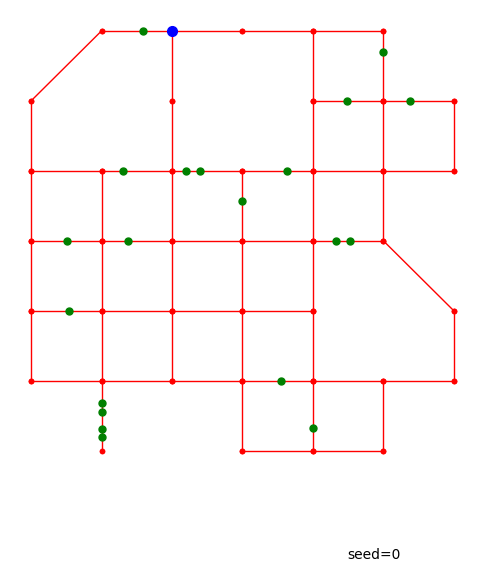

In [10]:
plotMap(M, T=C, P=[], W=W, text="seed=0")

# Generating Delivery Data

In [12]:
def generateDeliveryData(p, C, days, seed=0):
    ## p is the average number of parcels per day per customer
    ## C is the number of customers to be served
    ## days is the number of days for which data are to be generated.
    np.random.seed(seed)
    R = np.random.poisson(lam=C*p, size=days)
    D = [ sorted(list(np.random.choice(range(C), size=i))) for i in R ]
    return D

## Demo Example

In [15]:
D = generateDeliveryData(0.2, 10, 5)
D

[[0, 3, 3], [0, 5], [1, 2, 3, 3, 8], [3], []]

In [16]:
sum([len(i) for i in D])

11

Over 5 days, a total of 11 parcels are to be delivered:

- On the first day deliver one parcel to customers 0 and two parcels to customer 3. 
- On the second day deliver one parcel each to customer 0 and 5.
- On the third day deliver one parcel each to customers 1, 2 and 8, and two parcels to customer 3.
- On the fourth day deliver one parcel to customer 3.
- And on the fiths day there are no parcels to delier.

# Delivery over one month for Sample Map

In [13]:
D = generateDeliveryData(0.23, len(C), 30)

In [14]:
sum([len(i) for i in D])

32